# Restaurant Cuisine Data Rating EDA

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Data 

In [2]:
df = pd.read_csv('/Users/Hp/OneDrive/Desktop/datasets/cuisine_rating.csv')

In [3]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [4]:
df.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000



# Filtering Out data

In [7]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [8]:
df.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [9]:
df.tail()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
195,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No
199,140,"Upper East Side,NY",Male,2005,Married,Student,4,French,Never,Never,3,2,2.5,No


In [11]:
df.shape

(200, 14)

# Data Cleaning

In [12]:
#Checking for null values
round(df.isnull().sum()/len(df.index), 2)*100

Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

In [13]:
#Dropping Duplicate entries
df1=df.drop_duplicates()

In [14]:
df1.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


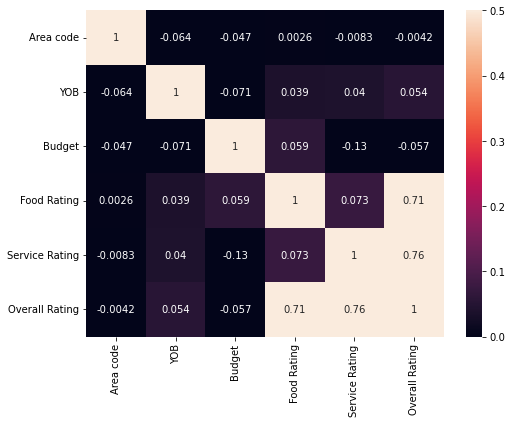

In [20]:
#checking the Correlation between the Columns
plt.figure(figsize = (8,6))
cor=df1.corr()
sns.heatmap(cor, annot = True,  vmin=0, vmax=0.5)
plt.show()

In [24]:
#Checking for unique/distinct values
print(df1.nunique()) 

Area code         65
Location          10
Gender             2
YOB               46
Marital Status     3
Activity           2
Budget             5
Cuisines           7
Alcohol            3
Smoker             3
Food Rating        5
Service Rating     5
Overall Rating     9
Often A S          2
dtype: int64


In [27]:
numerical_features   = df1.select_dtypes(include = [np.number]).columns
numerical_features

Index(['Area code', 'YOB', 'Budget', 'Food Rating', 'Service Rating',
       'Overall Rating'],
      dtype='object')

In [28]:
categorical_features = df1.select_dtypes(include= [np.object]).columns
categorical_features

Index(['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines',
       'Alcohol ', 'Smoker', 'Often A S'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [34]:
#Checking top 5 Cuisines
topcuisines = df1.groupby('Cuisines')['Food Rating'].sum().sort_values(ascending=False)
for i,r in topcuisines[:5].items():
    print(i,r)

Japanese 139
French 110
Filipino 92
Indian 89
Chinese 83


# Box plot for Distributions of Food Ratings across Cuisines

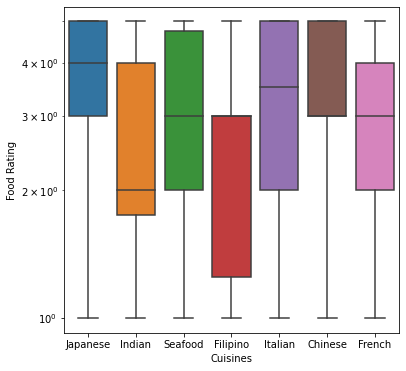

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Cuisines', y='Food Rating', data=df1)
plt.yscale('log')
plt.show()

# Location-wise Cuisines Offered

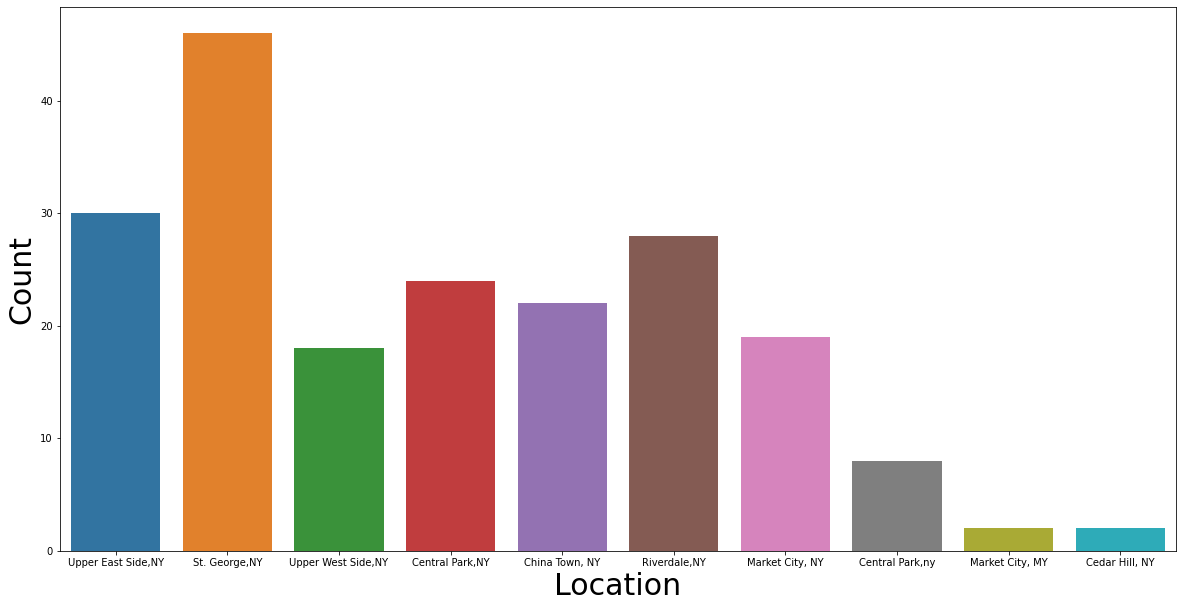

In [38]:
plt.figure(figsize=(20,10))

sns.countplot(df1['Location'])
plt.ylabel("Count",fontsize=30)
plt.xlabel("Location",fontsize=30)
plt.show()

From the above graph, we can see most of the restaurants are from the location St. George,NY.

# List of Popular cuisine based on marital status and activity of the Consumer

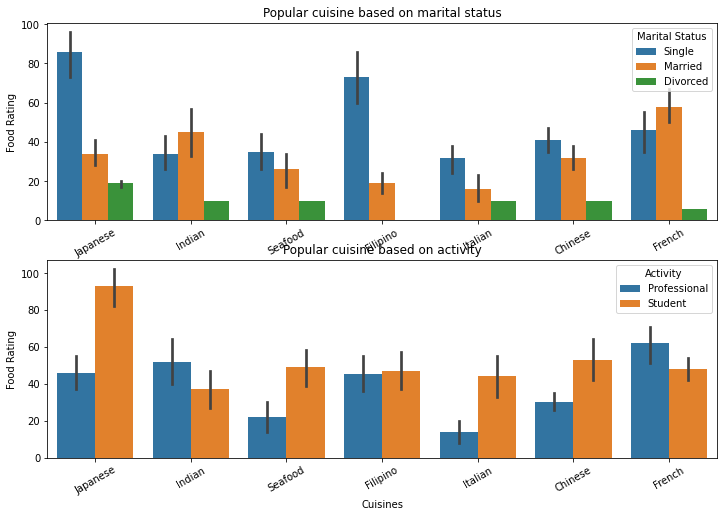

In [39]:
plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
p = sns.barplot(x='Cuisines', y='Food Rating', hue='Marital Status', data=df1, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Popular cuisine based on marital status')

plt.subplot(2, 1, 2)
p = sns.barplot(x='Cuisines', y='Food Rating', hue='Activity', data=df1, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Popular cuisine based on activity')

plt.show()

From the above 2 graphs, we can observe that, Japanese cuisine is preferred by Students as well as people who are single.

# Popular cuisine based on Gender

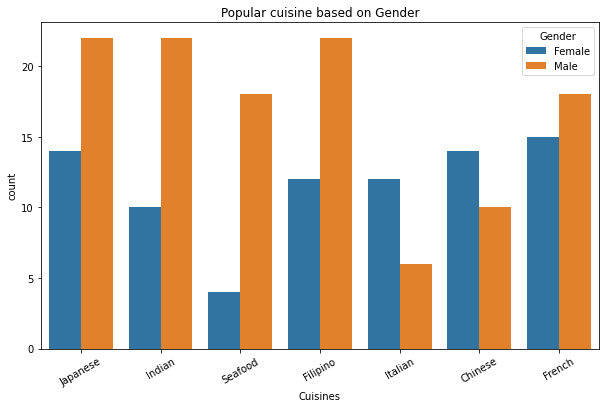

In [44]:
plt.figure(figsize=(10,6))
q = sns.countplot(x='Cuisines', hue='Gender', data=df1)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Popular cuisine based on Gender')
plt.show()

From the above graph, we can see Japanese, Indian, and Filipino cuisines are preferred by male mostly, and French, Chinese cuisines are preferred by female.

# TOP 5 Cuisine with Highest rating by Females

In [48]:
df1.query("Gender == 'Female'")[['Location','Gender','Marital Status','Activity','Smoker','Cuisines',
'Food Rating',]].sort_values(by=["Food Rating"], ascending=False).head(5).reset_index(drop=True)

,Location,Gender,Marital Status,Activity,Smoker,Cuisines,Food Rating
0,"Upper East Side,NY",Female,Single,Professional,Never,Japanese,5
1,"St. George,NY",Female,Single,Student,Often,Indian,5
2,"St. George,NY",Female,Divorced,Student,Often,Italian,5
3,"Upper West Side,NY",Female,Divorced,Professional,Often,Japanese,5
4,"Central Park,NY",Female,Single,Student,Never,Italian,5


# Top 5 Cuisine with Highest rating by Males

In [55]:
df1.query("Gender == 'Male'")[['Location','Gender','Marital Status','Activity','Smoker','Cuisines',
'Food Rating',]].sort_values(by=["Food Rating"], ascending=False).head(5).reset_index(drop=True)

,Location,Gender,Marital Status,Activity,Smoker,Cuisines,Food Rating
0,"Upper West Side,NY",Male,Single,Student,Often,Seafood,5
1,"Central Park,ny",Male,Single,Professional,Socially,French,5
2,"Market City, NY",Male,Married,Student,Often,Japanese,5
3,"Market City, NY",Male,Married,Professional,Often,Indian,5
4,"St. George,NY",Male,Divorced,Professional,Often,Indian,5


#  Popular Cuisines based on Ratings in each Location

<AxesSubplot:>

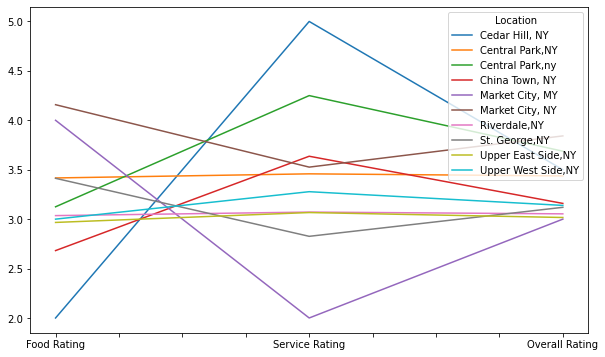

In [58]:
df1.groupby('Location')['Food Rating', 'Service Rating', 'Overall Rating'].mean().T.plot(figsize=(10,6))

# Most Common Cuisines in each Locations

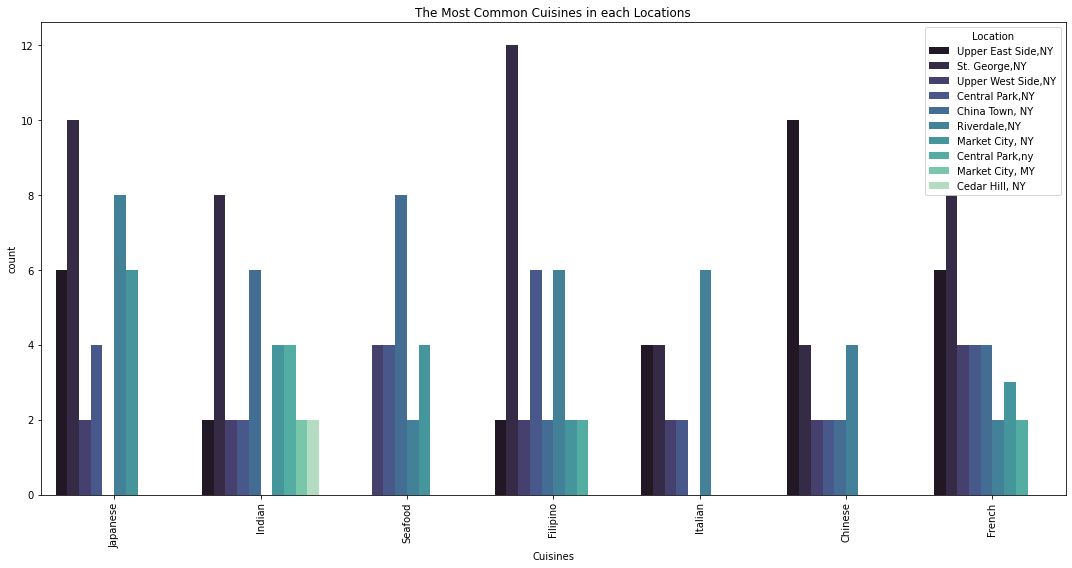

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(data=df1, x='Cuisines', hue='Location', palette='mako')
plt.title('The Most Common Cuisines in each Locations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Restaurants in each Location

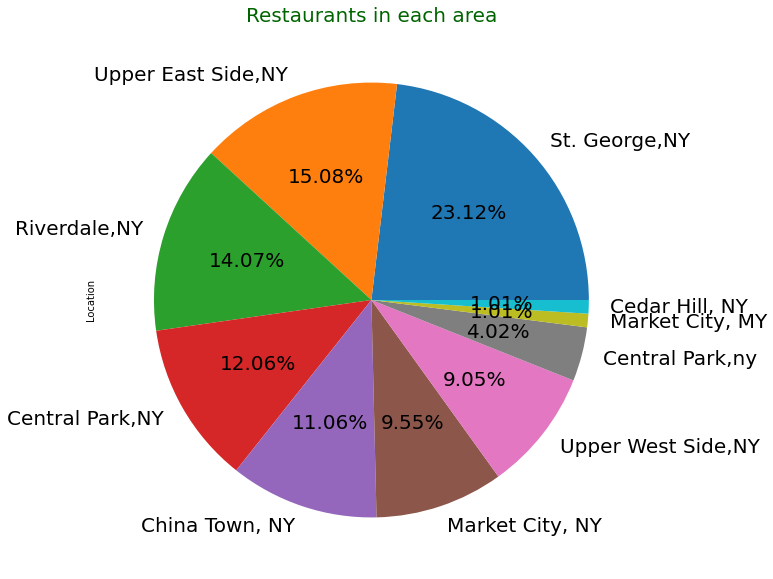

In [74]:
plt.figure(figsize=(10,10))

ax=df1.Location.value_counts()
ax.plot(kind='pie',fontsize=20, autopct='%1.2f%%')

plt.title('Restaurants in each area',fontsize=20,color='Darkgreen')
plt.show()